<a href="https://colab.research.google.com/github/wcj365/python-dataviz/blob/master/box_hist_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Histogram and Density Plots 
Using Pandas and Seaborn

References:
- https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
- https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [70]:
gapminder = pd.read_csv('http://bit.ly/2cLzoxH')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [71]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [74]:
gapminder["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [18]:
gapminder["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [17]:
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo Dem. Rep.', 'Congo Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea Dem. Rep.',
       'Korea Rep.', 'Kuwait', 'Lebanon',

In [77]:
len(gapminder["country"].unique())

142

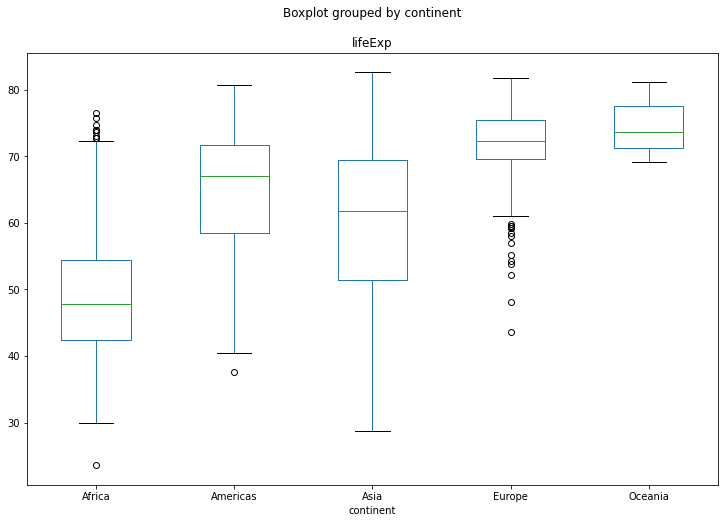

In [69]:
# Boxplot using Pandas 

gapminder.boxplot(by="continent", column="lifeExp", figsize=(12,8), grid=False)

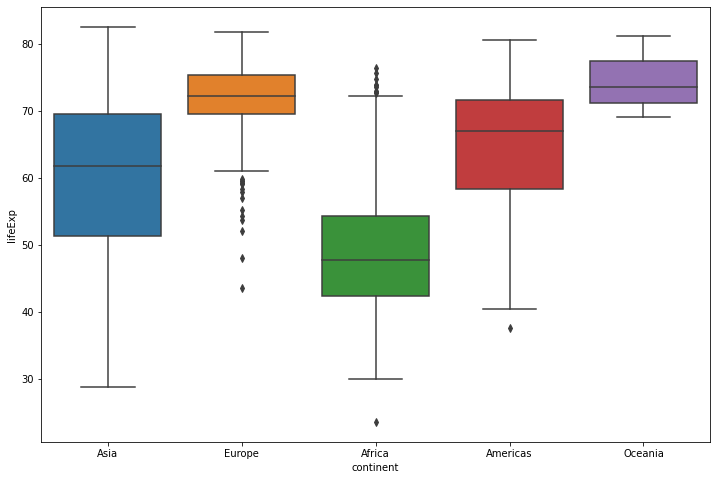

In [76]:
# Boxplot using Seaborn

plt.figure(figsize=(12,8))
sns.boxplot(data=gapminder, x="continent",  y="lifeExp" )

(22.0, 90.0)

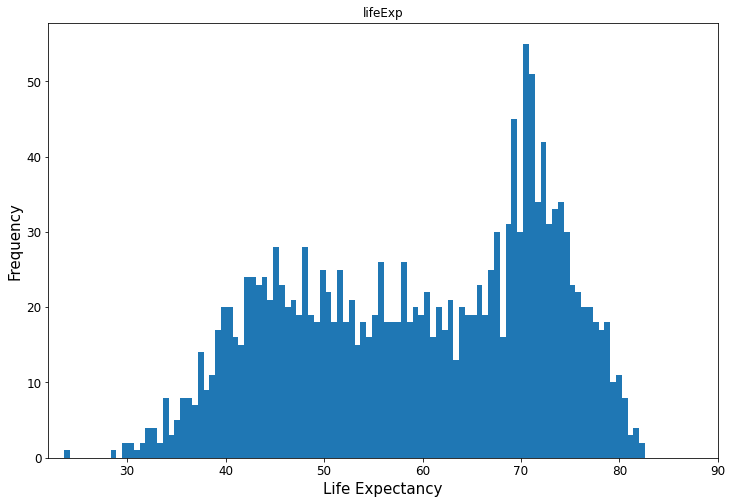

In [82]:
# Histogram using Pandas

gapminder.hist("lifeExp", bins=100, grid=False, xlabelsize=12, ylabelsize=12, figsize=(12,8))
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([22.0,90.0])

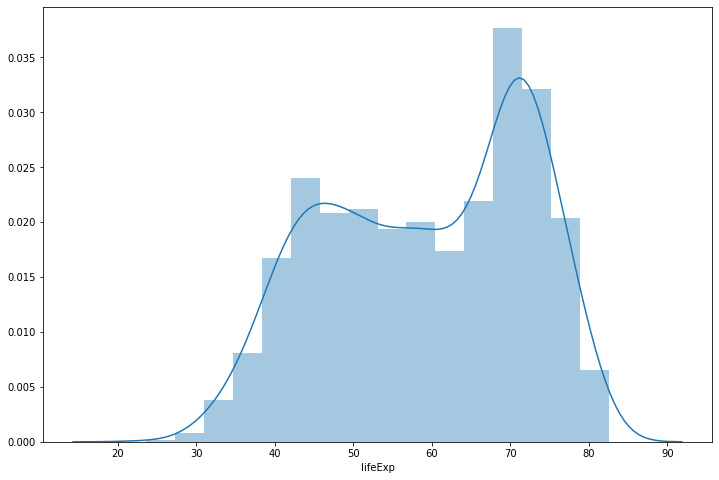

In [26]:
# Distribution plot (histogram and density plot) using Seaborn


sns.distplot(gapminder['lifeExp'])

Text(0, 0.5, 'Frequency')

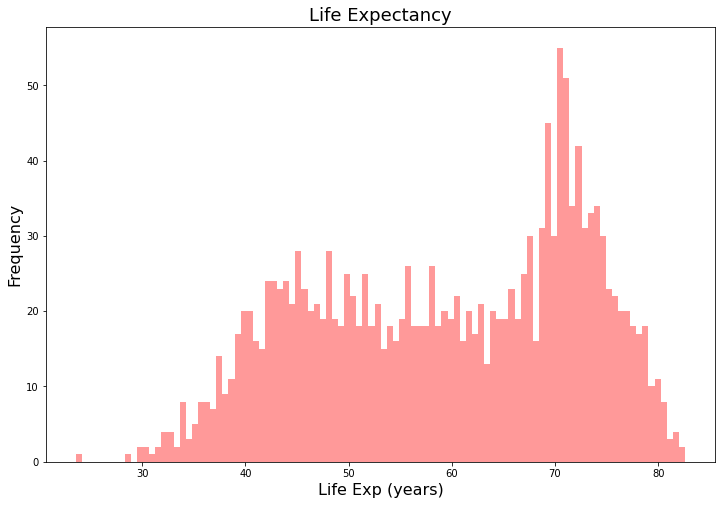

In [83]:
# Histogram using Seaborn
# KDE = Kernal Density Estimation

plt.figure(figsize=(12,8))
sns.distplot(gapminder['lifeExp'], kde=False, hist=True, color='red', bins=100)
plt.title('Life Expectancy', fontsize=18)
plt.xlabel('Life Exp (years)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Density')

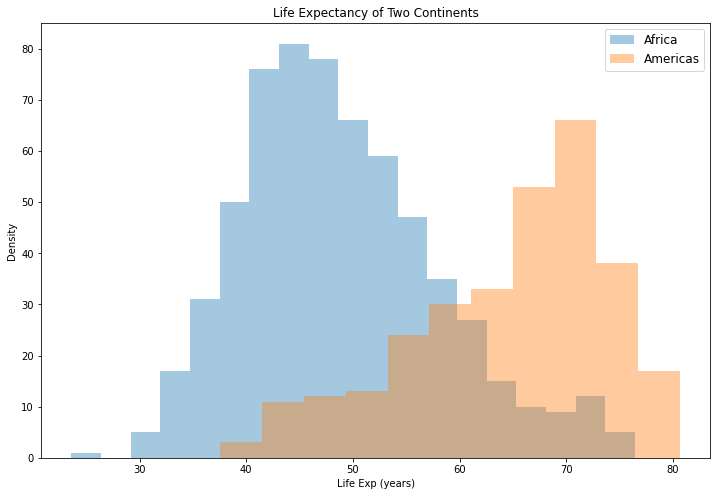

In [33]:
# Grouped histograms using Seaborn

plt.figure(figsize=(12,8))
df = gapminder[gapminder.continent == 'Africa']
sns.distplot(df['lifeExp'],  kde=False, label='Africa')
df =gapminder[gapminder.continent == 'Americas']
sns.distplot(df['lifeExp'],  kde=False,label='Americas')
plt.legend(prop={'size': 12})
plt.title('Life Expectancy of Two Continents')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

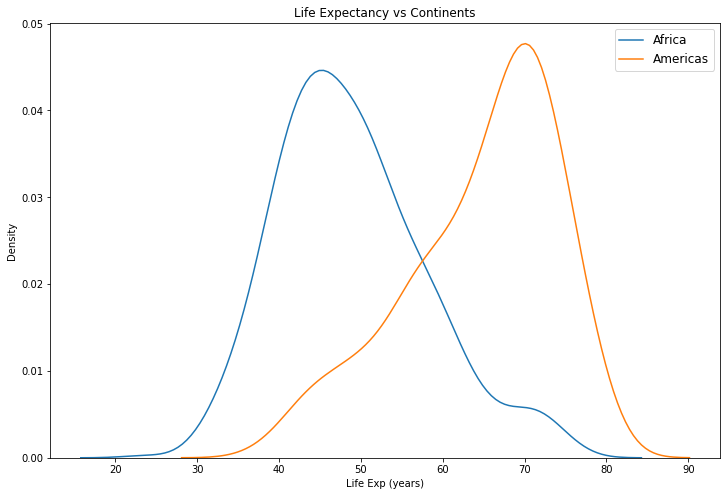

In [35]:
# Grouped density plot using Seaborn

plt.figure(figsize=(12,8))
df = gapminder[gapminder.continent == 'Africa']
sns.distplot(df['lifeExp'], hist = False, kde = True, label='Africa')
df = gapminder[gapminder.continent == 'Americas']
sns.distplot(df['lifeExp'], hist = False, kde = True, label='Americas')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy vs Continents')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density') 

Text(0, 0.5, 'Density')

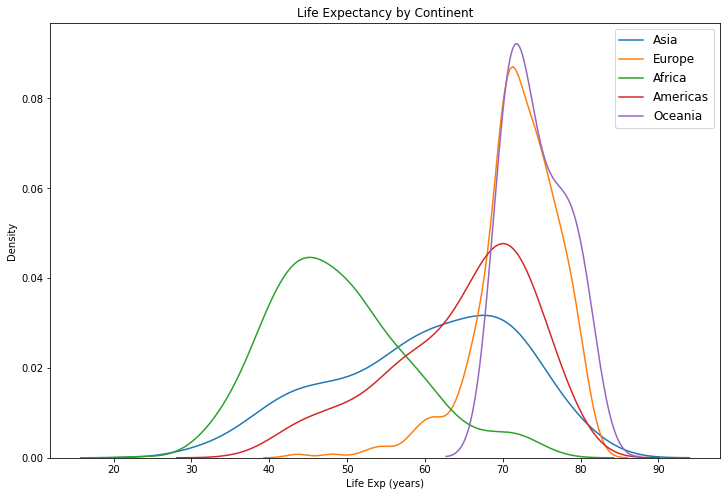

In [49]:
# Grouped density plot using Seaborn - for loop

plt.figure(figsize=(12,8))
for cont in gapminder["continent"].unique():
    df = gapminder[gapminder["continent"] == cont]
    sns.distplot(df['lifeExp'], hist = False, kde = True, label=cont)

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy by Continent')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density') 

Text(0, 0.5, 'Density')

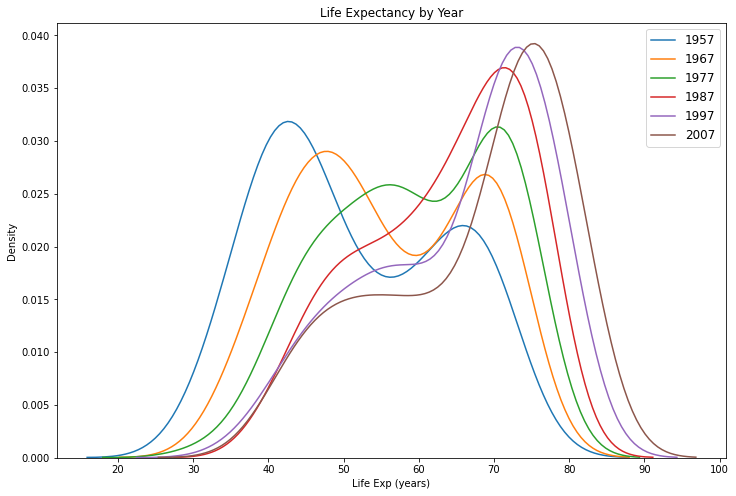

In [54]:
# Grouped density plot using Seaborn - for loop

plt.figure(figsize=(12,8))
for yr in gapminder["year"].unique():
    if int(yr) % 2 == 0:
        continue
    df = gapminder[gapminder["year"] == yr]
    sns.distplot(df['lifeExp'], hist = False, kde = True, label=yr)

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy by Year')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density') 

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

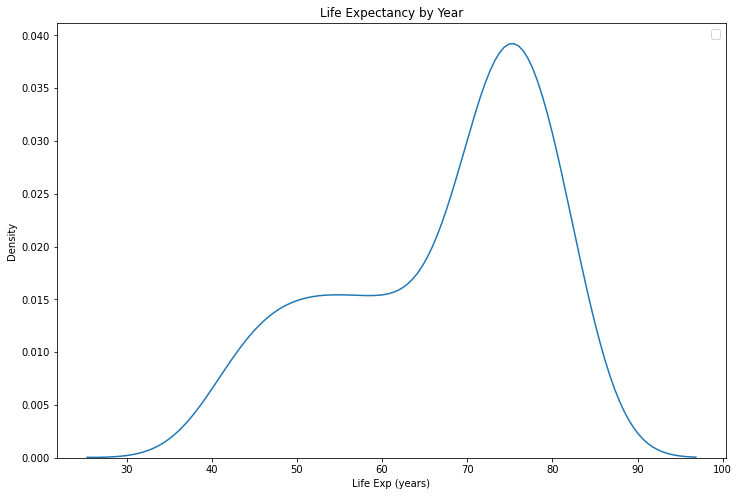

In [53]:
 plt.figure(figsize=(12,8))
 sns.distplot(df['lifeExp'], hist = False, kde = True)
 # Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy by Year')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density') 

Text(0, 0.5, 'Density')

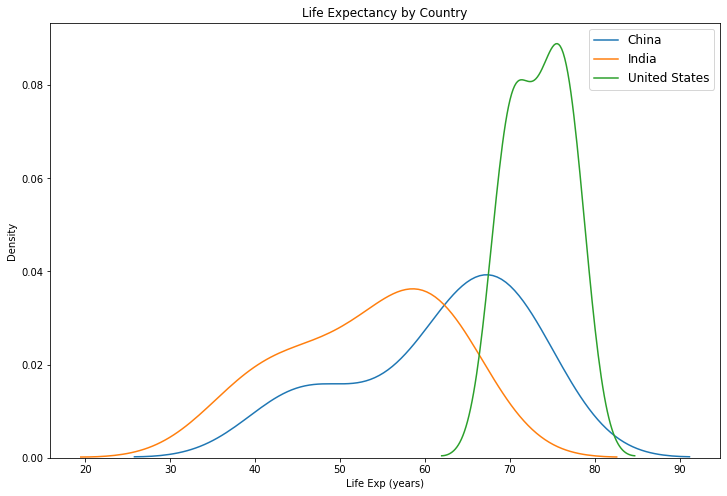

In [55]:
# Select a few countries to compare

plt.figure(figsize=(12,8))

countries = ["China", "India", "United States"]

for country in countries:
    df = gapminder[gapminder["country"] == country]
    sns.distplot(df['lifeExp'], hist = False, kde = True, label=country)

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Life Expectancy by Country')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density') 

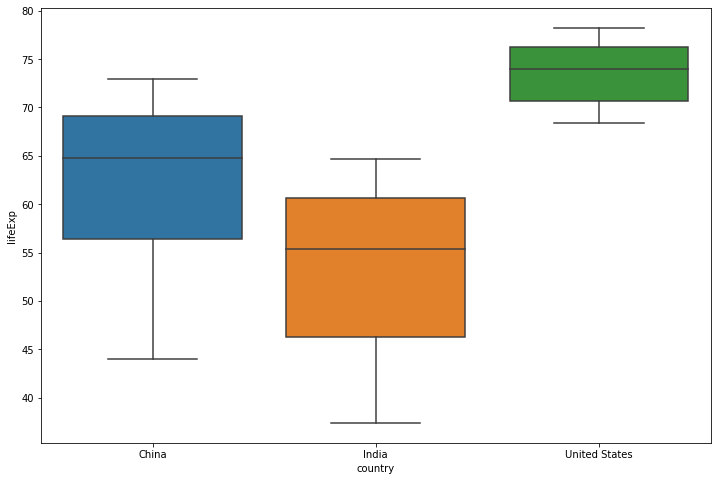

In [64]:
plt.figure(figsize=(12,8))

df = gapminder[gapminder["country"].isin(countries)]
sns.boxplot(x=df["country"],  y=df["lifeExp"] )